In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
def metrics(target, pred, fill=False):
    print(classification_report(target, pred))
    matrix = np.array(confusion_matrix(target, pred))
    if fill:
        np.fill_diagonal(matrix, 0)
    sns.heatmap(matrix, annot=True, fmt='.0f')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Матрица ошибок')

In [ ]:
titles = pd.read_csv('titles_data.csv', sep=';')
titles.tail()

,titles,target
3193,Путин поручил передать Республике Крым все акц...,0
3194,ЕК изучит просьбу Венгрии по нарушению Болгари...,0
3195,"Глава ""Россетей"" доложил Путину о достижении ц...",0
3196,"Платформа ""Мой экспорт"" научит устанавливать д...",0
3197,В Татарстане открыли завод по выпуску материнс...,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(titles['titles'], titles['target'], test_size=0.2, random_state=42)

In [ ]:
txt = ['мама мыла раму', 'мама чинила раму', 'мама мыла, мама чинила']
vectorizer = CountVectorizer()
txt = vectorizer.fit_transform(txt)
txt.toarray()


array([[1, 1, 1, 0],
       [1, 0, 1, 1],
       [2, 1, 0, 1]])

In [ ]:
vectorizer.get_feature_names_out()

array(['мама', 'мыла', 'раму', 'чинила'], dtype=object)

In [ ]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
#X_train_vec
vectorizer.get_feature_names_out()

array(['000', '10', '100', ..., 'ящик', 'ящике', 'ящики'], dtype=object)

In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       301
           1       0.91      0.90      0.91       339

    accuracy                           0.90       640
   macro avg       0.90      0.90      0.90       640
weighted avg       0.90      0.90      0.90       640



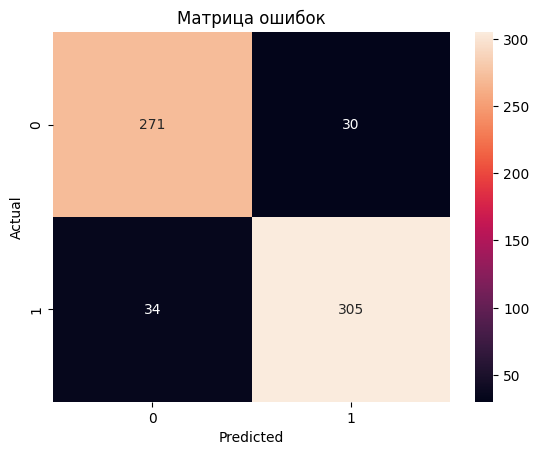

In [ ]:
y_pred = model.predict(X_test_vec)
metrics(y_test, y_pred)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
txt = ['мама мыла раму', 'мама чинила раму', 'мама мыла, мама чинила']
vectorizer = TfidfVectorizer()
txt = vectorizer.fit_transform(txt)
txt.toarray()

array([[0.48133417, 0.61980538, 0.61980538, 0.        ],
       [0.48133417, 0.        , 0.61980538, 0.61980538],
       [0.73941068, 0.47606294, 0.        , 0.47606294]])

In [ ]:
vectorizer.get_feature_names_out()

array(['мама', 'мыла', 'раму', 'чинила'], dtype=object)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       301
           1       0.91      0.91      0.91       339

    accuracy                           0.90       640
   macro avg       0.90      0.90      0.90       640
weighted avg       0.90      0.90      0.90       640



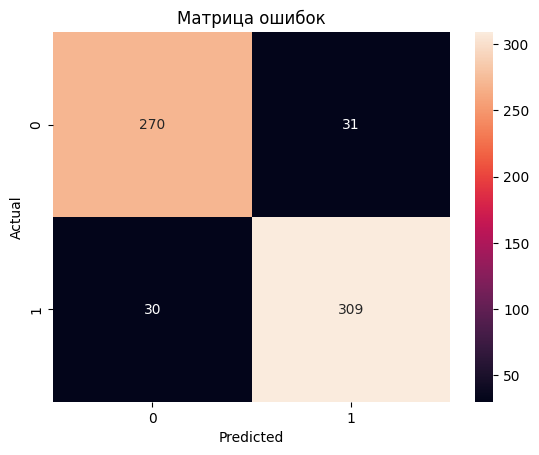

In [ ]:
y_pred = model.predict(X_test_vec)
metrics(y_test, y_pred)

In [ ]:
from pymystem3 import Mystem
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
m = Mystem()
nltk.download('stopwords')
stop_words = list(stopwords.words('russian'))

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#m.lemmatize('шел этот человек')
m.lemmatize('Интересного текста много не бывает')

['интересный', ' ', 'текст', ' ', 'много', ' ', 'не', ' ', 'бывать', '\n']

In [ ]:
''.join(m.lemmatize('Интересного текста много не бывает'))

'интересный текст много не бывать\n'

In [ ]:
train_ru = [" ".join(re.sub(r'[^а-яА-ЯёЁ]', ' ', text).split()) for text in X_train.values.astype('U')]
train_full = ' br '.join(train_ru)
train_lem = (''.join([word for word in m.lemmatize(train_full) if word != '\n'])).split(' br ')

test_ru = [" ".join(re.sub(r'[^а-яА-ЯёЁ]', ' ', text).split()) for text in X_test.values.astype('U')]
test_full = ' br '.join(test_ru)
test_lem = (''.join([word for word in m.lemmatize(test_full) if word != '\n'])).split(' br ')

In [ ]:
train_lem

['шиитский вооруженный формирование обстреливать американский база в ирак',
 'погибший военкор журавлев отмечать литературный премия',
 'кто пересчитывать пенсия с ноябрь на индексация мочь рассчитывать несколько категория',
 'вылетать через окно страшный гибель жена известный блогер',
 'депутат ямпольская выражать соболезнование в связь со смерть гладков',
 'чтобы сближаться с мужчина просто задавать он этот вопрос',
 'за место в очередь для покупка билет на щелкунчик просить тысяча рубль',
 'музей восток на выставка россия представлять много сто экспонат',
 'в россия представлять отечественный мусоровоз гибрид',
 'путин поручать разрабатывать программа развитие электроэнергетика в дфо',
 'заявление захарова о мус прогреметь на весь мир',
 'ответ знать единица как часто нужно менять губка для мытье посуда',
 'в ран сделать заявление о таинственный инопланетный сигнал',
 'невероятный заявление диетолог мочь ли простой колбаса вызывать онкология',
 'умирать писательница нина садур',
 'м

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
X_train_lem = tfidf_vectorizer.fit_transform(train_lem)
X_test_lem = tfidf_vectorizer.transform(test_lem)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       301
           1       0.90      0.89      0.89       339

    accuracy                           0.89       640
   macro avg       0.89      0.89      0.89       640
weighted avg       0.89      0.89      0.89       640



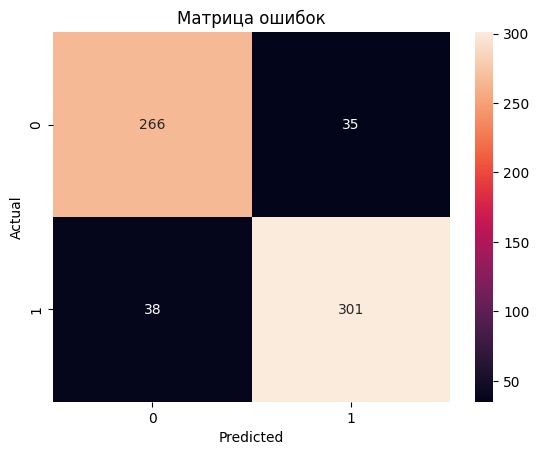

In [ ]:
model = MultinomialNB()
model.fit(X_train_lem, y_train)
y_pred = model.predict(X_test_lem)
metrics(y_test, y_pred)

In [ ]:
count_vectorizer = CountVectorizer(stop_words=stop_words)
X_train_lem = count_vectorizer.fit_transform(train_lem)
X_test_lem = count_vectorizer.transform(test_lem)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       301
           1       0.90      0.89      0.89       339

    accuracy                           0.89       640
   macro avg       0.89      0.89      0.89       640
weighted avg       0.89      0.89      0.89       640



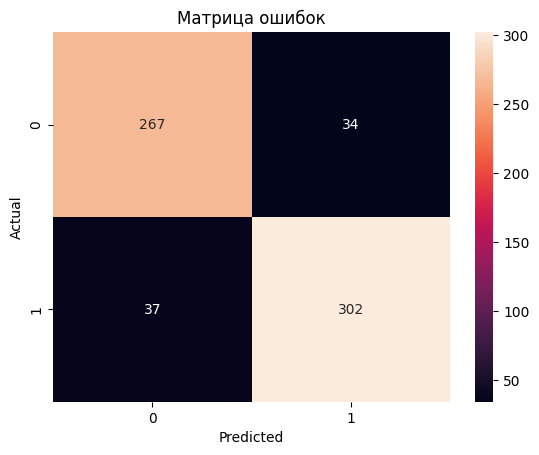

In [ ]:
model = MultinomialNB()
model.fit(X_train_lem, y_train)
y_pred = model.predict(X_test_lem)
metrics(y_test, y_pred)

In [ ]:
diabetes = pd.read_csv('diabetes_dataset.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop(['Outcome'], axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1275
           1       1.00      0.98      0.99       633

    accuracy                           0.99      1908
   macro avg       0.99      0.99      0.99      1908
weighted avg       0.99      0.99      0.99      1908



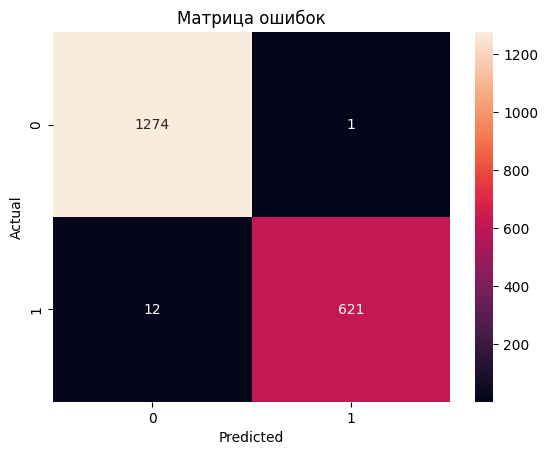

In [ ]:
y_pred = clf.predict(X_test)
metrics(y_test, y_pred)

In [ ]:
clf = LogisticRegression(class_weight='balanced', random_state=42).fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1275
           1       1.00      0.99      0.99       633

    accuracy                           1.00      1908
   macro avg       1.00      0.99      0.99      1908
weighted avg       1.00      1.00      1.00      1908



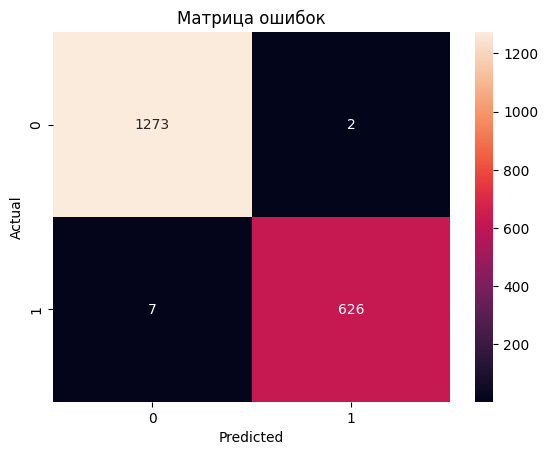

In [ ]:
y_pred = clf.predict(X_test)
metrics(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
proba = clf.predict_proba(X_test)
proba_one = proba[:, 1]

In [ ]:
proba

array([[8.78218188e-01, 1.21781812e-01],
       [3.10591431e-08, 9.99999969e-01],
       [9.94601126e-01, 5.39887441e-03],
       ...,
       [9.95488567e-01, 4.51143275e-03],
       [1.17832488e-06, 9.99998822e-01],
       [9.99281435e-01, 7.18565234e-04]])

In [ ]:
proba_one

array([1.21781812e-01, 9.99999969e-01, 5.39887441e-03, ...,
       4.51143275e-03, 9.99998822e-01, 7.18565234e-04])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, proba_one)

Text(0.5, 1.0, 'ROC-кривая')

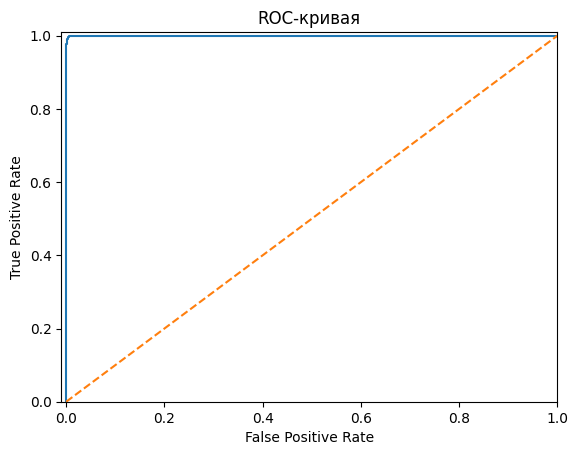

In [ ]:
plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

In [ ]:
auc_roc = roc_auc_score(y_test, y_pred)
print('AUC-ROC:',auc_roc)

AUC-ROC: 0.993686460366137


<Axes: title={'center': 'Корреляционная матрица'}>

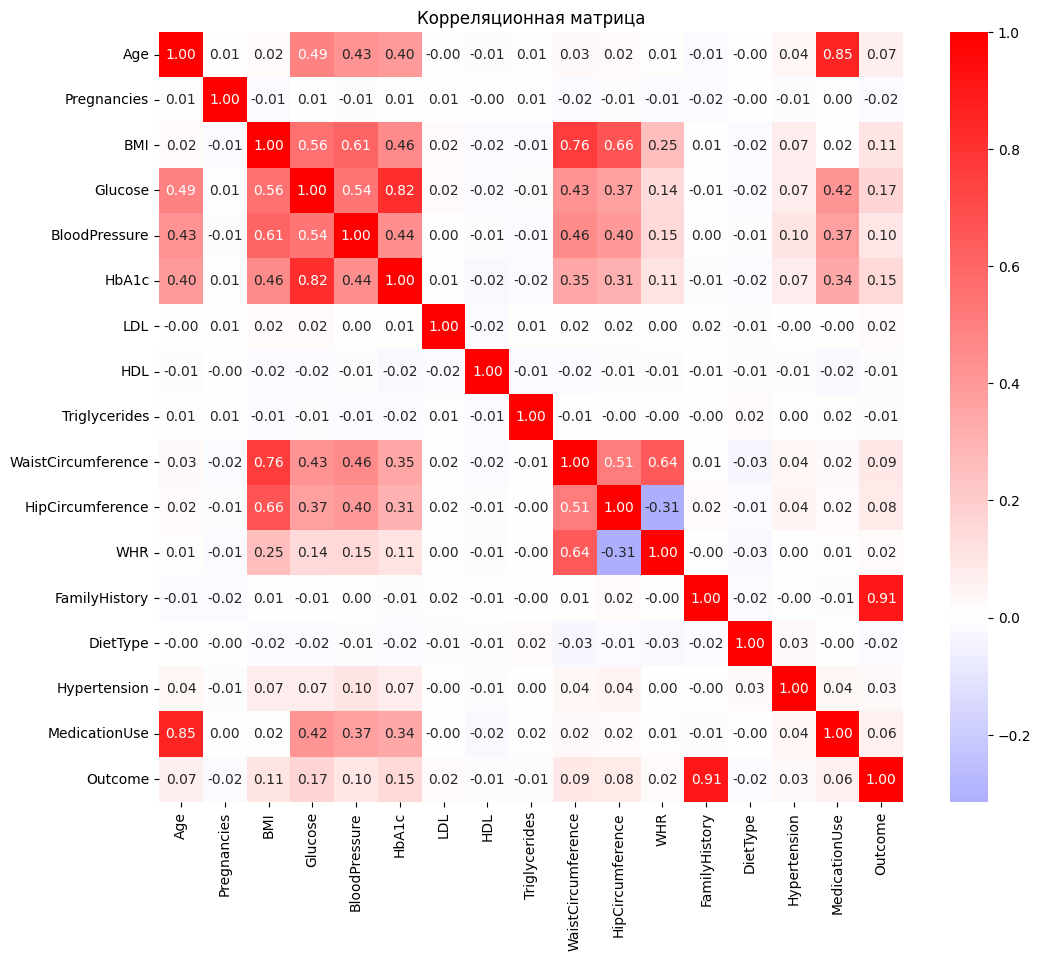

In [ ]:
plt.figure(figsize=(12,10))
plt.title('Корреляционная матрица')
sns.heatmap(diabetes.corr(), cmap='bwr', center=0, annot=True, fmt='.2f')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop(['Outcome', 'FamilyHistory'], axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(max_depth=8, class_weight='balanced', random_state=42).fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.71      0.98      0.82      1275
           1       0.83      0.18      0.29       633

    accuracy                           0.71      1908
   macro avg       0.77      0.58      0.56      1908
weighted avg       0.75      0.71      0.65      1908



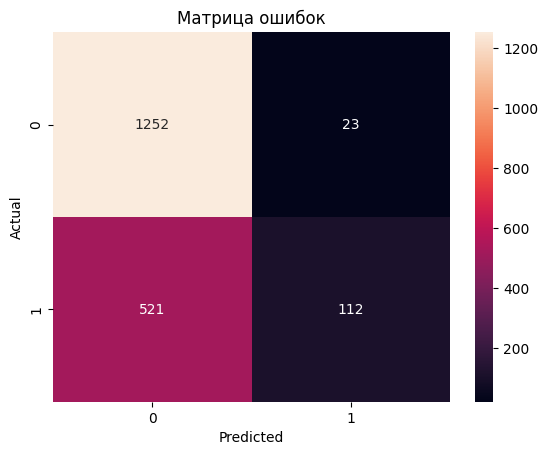

In [ ]:
metrics(y_test, rf.predict(X_test))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop(['Outcome', 'FamilyHistory', 'HbA1c'], axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(max_depth=8, class_weight='balanced', random_state=42).fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.70      0.97      0.82      1275
           1       0.73      0.18      0.30       633

    accuracy                           0.71      1908
   macro avg       0.72      0.58      0.56      1908
weighted avg       0.71      0.71      0.64      1908



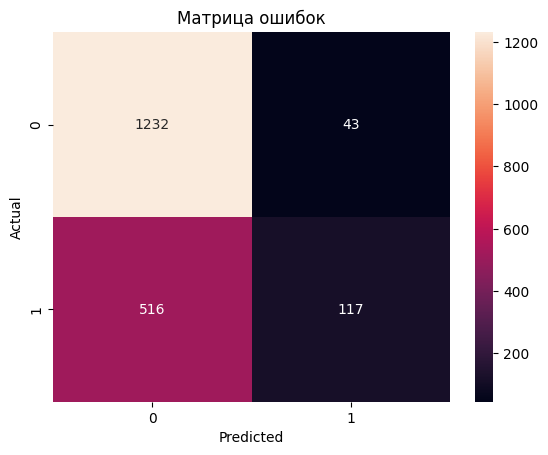

In [ ]:
metrics(y_test, rf.predict(X_test))

In [ ]:
rf.feature_importances_

array([5.11731455e-02, 2.90644971e-02, 8.61577502e-02, 4.25207020e-01,
       5.93654714e-02, 5.20912956e-02, 5.93623454e-02, 4.93090743e-02,
       6.19279061e-02, 6.51326977e-02, 4.19234818e-02, 1.01534967e-02,
       1.85802561e-04, 8.94601571e-03])

In [ ]:
pd.Series(data=rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

,0
Glucose,0.425207
BMI,0.086158
HipCircumference,0.065133
WaistCircumference,0.061928
BloodPressure,0.059365
HDL,0.059362
LDL,0.052091
Age,0.051173
Triglycerides,0.049309
WHR,0.041923


              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1275
           1       0.99      0.17      0.28       633

    accuracy                           0.72      1908
   macro avg       0.85      0.58      0.56      1908
weighted avg       0.80      0.72      0.65      1908



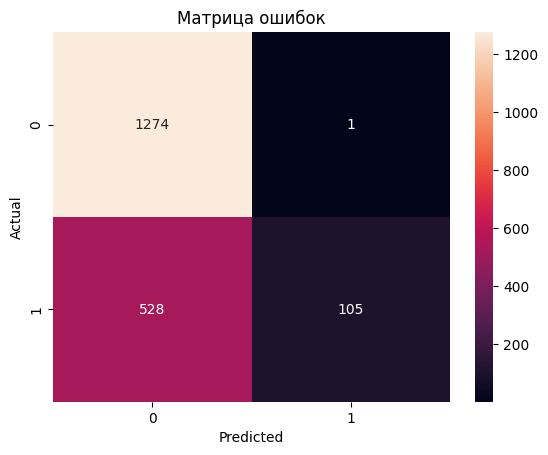

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop(['Outcome', 'FamilyHistory', 'DietType', 'Pregnancies', 'MedicationUse'], axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)
rf = RandomForestClassifier(max_depth=8, random_state=42).fit(X_train, y_train)
metrics(y_test, rf.predict(X_test))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

Text(0.5, 1.0, 'ROC-кривая')

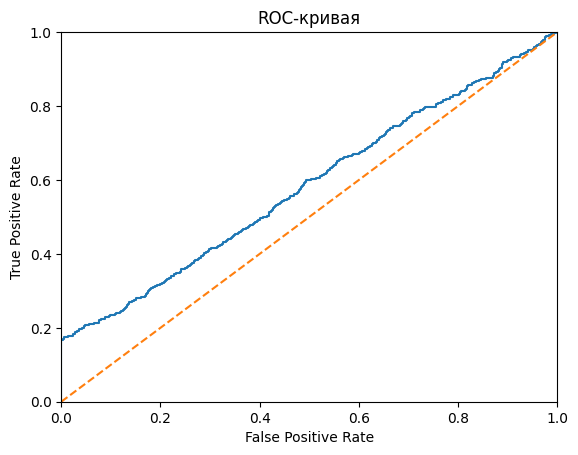

In [ ]:
plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

In [ ]:
auc_roc = roc_auc_score(y_test, rf.predict(X_test))
print(auc_roc)

0.5825462317628474


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop(['Outcome', 'FamilyHistory'], axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'max_depth': [5, 8], 'n_estimators': [50, 100], 'random_state': [42]}
clf = GridSearchCV(rf, parameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8], 'n_estimators': [50, 100],
                         'random_state': [42]},
             scoring='roc_auc')

In [ ]:
clf.best_score_

np.float64(0.5953933447533425)

In [ ]:
clf.best_params_

{'max_depth': 8, 'n_estimators': 100, 'random_state': 42}

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.22717066, 0.4490797 , 0.40028963, 0.64522491]),
 'std_fit_time': array([0.00773969, 0.01190957, 0.02528996, 0.00640311]),
 'mean_score_time': array([0.00703535, 0.01091361, 0.01033487, 0.01367602]),
 'std_score_time': array([0.00043882, 0.00010981, 0.00143498, 0.00086325]),
 'param_max_depth': masked_array(data=[5, 5, 8, 8],
              mask=[False, False, False, False],
        fill_value=999999),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value=999999),
 'param_random_state': masked_array(data=[42, 42, 42, 42],
              mask=[False, False, False, False],
        fill_value=999999),
 'params': [{'max_depth': 5, 'n_estimators': 50, 'random_state': 42},
  {'max_depth': 5, 'n_estimators': 100, 'random_state': 42},
  {'max_depth': 8, 'n_estimators': 50, 'random_state': 42},
  {'max_depth': 8, 'n_estimators': 100, 'random_state': 42}],
 'split0_test_score': array([0.59865039, 0

In [ ]:
parameters = {'max_depth': range(5, 11, 1), 'n_estimators': [50, 100], 'class_weight': ['balanced', None], 'random_state': [42]}
clf = GridSearchCV(rf, parameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': range(5, 11), 'n_estimators': [50, 100],
                         'random_state': [42]},
             scoring='roc_auc')

In [ ]:
clf.best_score_

np.float64(0.6036875166712388)

In [ ]:
clf.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'n_estimators': 50,
 'random_state': 42}

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.22874041, 0.44856997, 0.2605545 , 0.58667407, 0.29405017,
        0.5806725 , 0.32388234, 0.65057311, 0.47013588, 0.80078297,
        0.3920435 , 0.82243085, 0.25678234, 0.44766064, 0.25504518,
        0.5114202 , 0.2905982 , 0.64272161, 0.32103138, 0.64347687,
        0.35586667, 0.7300787 , 0.43258066, 0.77113194]),
 'std_fit_time': array([0.00418729, 0.01043388, 0.00737808, 0.05993265, 0.00422839,
        0.00747006, 0.00573437, 0.017531  , 0.05446567, 0.10306913,
        0.00916308, 0.08509199, 0.02898434, 0.00927995, 0.00315009,
        0.00646965, 0.00333301, 0.06542303, 0.00825071, 0.00710803,
        0.00752862, 0.04362473, 0.04042977, 0.00932009]),
 'mean_score_time': array([0.00691528, 0.01150923, 0.00730829, 0.01460738, 0.0078301 ,
        0.01251411, 0.00806546, 0.01361828, 0.01007738, 0.01525149,
        0.00919342, 0.01624537, 0.00814753, 0.01201935, 0.00712852,
        0.01157017, 0.00766549, 0.01535611, 0.00831203, 0.01331367,
        0.008989

In [ ]:
stud = pd.read_csv('Student_performance_data.csv')

In [ ]:
stud

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(stud.drop(['GradeClass'], axis=1), stud['GradeClass'], test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(max_depth=8).fit(X_train, y_train)

              precision    recall  f1-score   support

         0.0       1.00      0.27      0.43        22
         1.0       0.74      0.88      0.80        49
         2.0       0.90      0.88      0.89        85
         3.0       0.89      0.90      0.89        86
         4.0       0.95      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.90      0.78      0.80       479
weighted avg       0.91      0.91      0.90       479



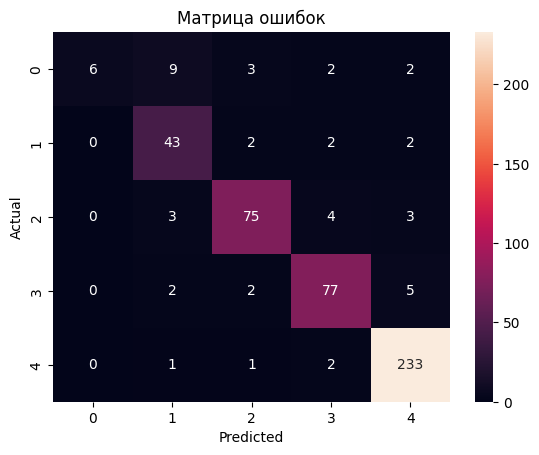

In [ ]:
metrics(y_test, rf.predict(X_test))

              precision    recall  f1-score   support

         0.0       1.00      0.27      0.43        22
         1.0       0.74      0.88      0.80        49
         2.0       0.90      0.88      0.89        85
         3.0       0.89      0.90      0.89        86
         4.0       0.95      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.90      0.78      0.80       479
weighted avg       0.91      0.91      0.90       479



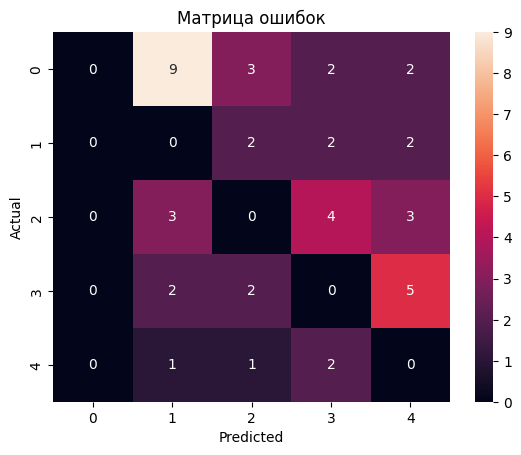

In [ ]:
metrics(y_test, rf.predict(X_test), True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(stud.drop(['GradeClass'], axis=1), stud['GradeClass'], test_size=0.2, random_state=42)
rf = RandomForestClassifier()

In [ ]:
parameters = {'max_depth': range(5, 11, 1), 'n_estimators': [50, 100], 'class_weight': ['balanced', None], 'random_state': [42]}
clf = GridSearchCV(rf, parameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/us

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8], 'n_estimators': [50, 100],
                         'random_state': [42]},
             scoring='roc_auc')

In [ ]:
clf.best_score_

np.float64(nan)

In [ ]:
clf.best_params_

{'max_depth': 5, 'n_estimators': 50, 'random_state': 42}

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.12484717, 0.27457843, 0.0931283 , 0.18013654]),
 'std_fit_time': array([0.00335256, 0.07629541, 0.007277  , 0.00429095]),
 'mean_score_time': array([0.00939088, 0.01363773, 0.00596046, 0.00934715]),
 'std_score_time': array([0.00046027, 0.00335018, 0.00013936, 0.00016778]),
 'param_max_depth': masked_array(data=[5, 5, 8, 8],
              mask=[False, False, False, False],
        fill_value=999999),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value=999999),
 'param_random_state': masked_array(data=[42, 42, 42, 42],
              mask=[False, False, False, False],
        fill_value=999999),
 'params': [{'max_depth': 5, 'n_estimators': 50, 'random_state': 42},
  {'max_depth': 5, 'n_estimators': 100, 'random_state': 42},
  {'max_depth': 8, 'n_estimators': 50, 'random_state': 42},
  {'max_depth': 8, 'n_estimators': 100, 'random_state': 42}],
 'split0_test_score': array([nan, nan, nan